In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stores = pd.read_csv(r"C:\Users\user\Downloads\Datasets\russian_alcohol_consumption.csv")
stores



,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


# Exploratory Data Analysis
 The Dataset contains 1615 rows and 7 columns
 - **Year**: Integer data type. I converted it to a datetime format using pandas pd_to_datetime function.
 - **region**: It is an object type. The region in which the consumption occurred.There are 85 distinct regions in the dataset.It contained no missing value
 - **wine**: Float data type. It describes the quantity of wine consumed in that region. It had 63 missing values
 - **beer**: Float data type, describing the quantity of beer consumed. There were 58 missing values.
 - **Vodka**: Float data type. describes the quantity of vodka consumed. It had 61 missing values.
 - **champagne**: Float data type, describing the quantity of champagne consumed. It had 63 missing values.
 - **brandy**: Float data type, describing the quantity of brandy consumed. It had 66 missing values.

**Note:** Since the missing values are less than 5% of the dataset, I used *Median Imputation* method to fill missing values in each of the columns with missing values.

In [4]:
stores.shape
stores.describe()
stores.isna().sum()
stores.drop_duplicates(inplace=True)
stores.info()
stores['year'] = pd.to_datetime(stores['year'], format='%Y')
stores['region'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


85

In [5]:
stores.loc[:, 'wine'] = stores['wine'].fillna(stores['wine'].median())
stores.loc[:, 'beer'] = stores['beer'].fillna(stores['beer'].median())
stores.loc[:, 'vodka'] = stores['vodka'].fillna(stores['vodka'].median())
stores.loc[:, 'champagne'] = stores['champagne'].fillna(stores['champagne'].median())
stores.loc[:, 'brandy'] = stores['brandy'].fillna(stores['brandy'].median())
stores.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

# **Introduction**
This analysis aims to identify 10 high-potential regions in Russia where a wine promotion campaign, similar to the one successfully implemented in Saint Petersburg, can be effectively replicated.

**For the purpose of this study and analysis, the term *"Wine"* refers to the combined analysis of both wine and champagne** unless otherwise stated. This is because champagne is a type of sparkling wine, and including it provides a more comprehensive view of overall wine consumption trends across regions.

In [61]:
# Aggregate total alcohol consumption per region
regional_consumption = stores.groupby('region')[['wine', 'beer', 'vodka', 'champagne', 'brandy']].sum()
# Total Alcohol consumption across all types 
regional_consumption['total'] = regional_consumption.sum(axis=1)
top_10_alcohol = regional_consumption.sort_values(by='total', ascending=False).head(10)
top_10_alcohol.reset_index(inplace=True)
top_10_alcohol

,region,wine,beer,vodka,champagne,brandy,total
0,Moscow,140.25,1590.08,361.42,83.34,23.90,2198.99
1,Saint Petersburg,132.10,1603.13,224.61,46.91,21.23,2027.98
2,Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63
3,Tyumen Oblast,105.30,1462.05,281.69,27.10,15.99,1892.13
4,Komi Republic,175.25,1249.14,392.43,32.25,15.39,1864.46
5,Khanty–Mansi Autonomous Okrug – Yugra,101.09,1403.06,285.23,27.49,17.56,1834.43
6,Chelyabinsk Oblast,131.94,1408.80,245.93,27.84,10.65,1825.16
7,Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44
8,Sverdlovsk Oblast,140.27,1367.22,257.71,25.85,13.10,1804.15
9,Ivanovo Oblast,137.51,1387.02,234.84,17.97,7.05,1784.39


<function matplotlib.pyplot.show(close=None, block=None)>

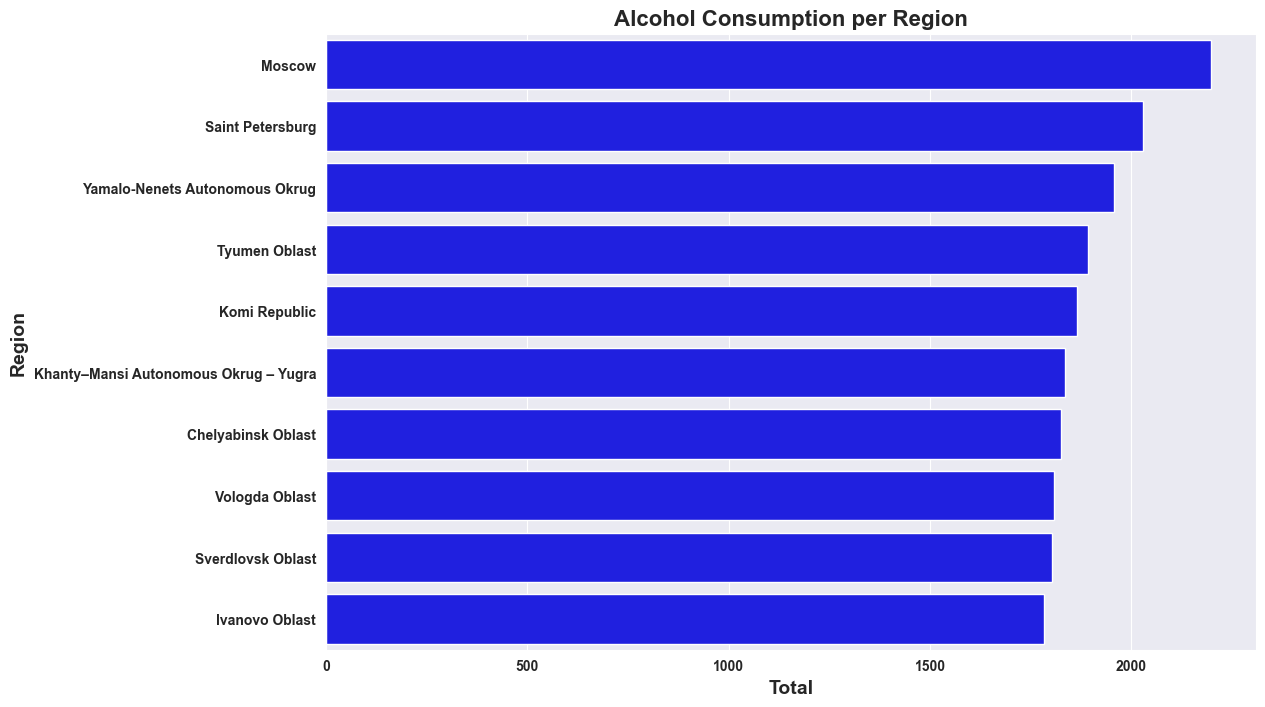

In [69]:
plt.figure(figsize=(12,8))
sns.set_palette('magma')
sns.set_style('darkgrid')
sns.barplot(data=top_10_alcohol, y='region', x='total', color='blue')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Region', fontsize=14, fontweight='bold')
plt.xlabel('Total', fontsize=14, fontweight='bold')
plt.title('Alcohol Consumption per Region', fontsize=16, fontweight='bold')
plt.show

# **Total Alcohol Consumption By Region**
From the plot above we can see the **Top 10 alcohol consumption regions** throughout the year. The data was collected between **1998-2016** by region. **Moscow** has the highest consumption rate with a total of **2198.99 litres**, followed by **Saint Petersburg(2027.98 litres)**, **Yamalo-Nenets Autonomous Okrug** came third with a total of **1956.63 litres**. 

In [72]:
# Top 10 Regions with High Wine Consumption by Region
wine_consumption = stores.groupby('region')[['wine', 'champagne']].sum()
wine_consumption['total'] = wine_consumption.sum(axis=1)
top_10_wine = wine_consumption.sort_values(by='total', ascending=False).head(10)
top_10_wine.reset_index(inplace=True)
print(top_10_wine)

                    region    wine  champagne   total
0      Republic of Karelia  204.48      20.17  224.65
1                   Moscow  140.25      83.34  223.59
2             Pskov Oblast  195.85      22.29  218.14
3            Komi Republic  175.25      32.25  207.50
4  Nenets Autonomous Okrug  170.73      36.36  207.09
5          Novgorod Oblast  174.51      24.71  199.22
6       Arkhangelsk Oblast  164.73      30.99  195.72
7          Murmansk Oblast  149.22      45.72  194.94
8           Vologda Oblast  177.24      16.29  193.53
9           Kamchatka Krai  138.29      52.00  190.29


<function matplotlib.pyplot.show(close=None, block=None)>

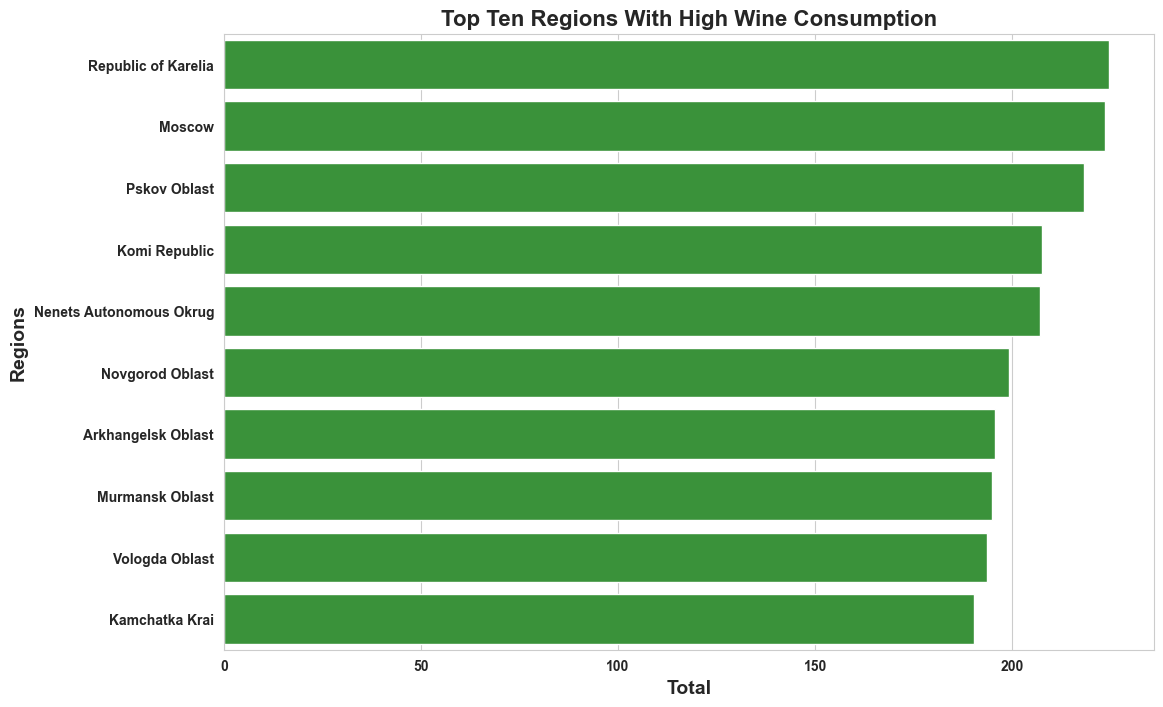

In [74]:
plt.figure(figsize=(12,8))
sns.set_palette('magma')
sns.set_style('whitegrid')
sns.barplot(data=top_10_wine, x='total', y='region', color='#2ca02c')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Regions', fontsize=14, fontweight='bold')
plt.xlabel('Total', fontsize=14, fontweight='bold')
plt.title('Top Ten Regions With High Wine Consumption', fontsize=16, fontweight='bold')
plt.show

# Top 10 Wine Consumption by Region
In line with the goal of this project which is to identify buying habits for regions with high wine consumption rate inorder to introduce the wine promotions to such regions. The barchart above shows the **Top 10 Regions With High Wine Consumption**.

From the chart, we can see that **Republic of Karelia** has the highest consumption rate of *224.65*, follwed by **Moscow** with a consumption rate of *223.56*. **Pskov Oblast** came third with a total of *218.14*.

<Axes: title={'center': 'Yearly Wine & Champagne Consumption Trends'}, xlabel='Year', ylabel='Total Wine'>

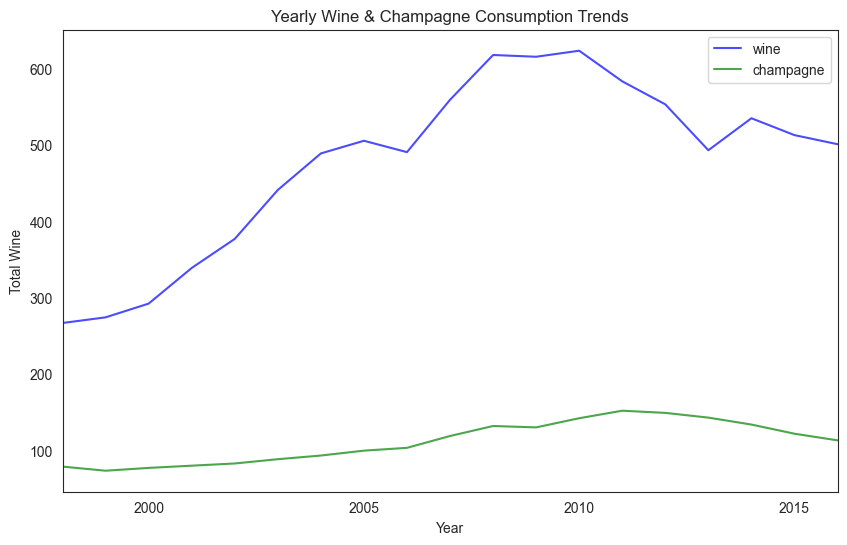

In [76]:
#Yearly trend for wine types
sns.set_style('white')
yearly_trends = stores.groupby('year')[['wine', 'champagne']].sum()
#yearly_trends.to_csv(r"C:\Users\user\Downloads\Datasets\yearly_trends.csv", index=False)
#Plot yearly trends of all wine type consumption
colors = {'wine':'blue', 'champagne':'green'}
yearly_trends.plot(figsize=(10, 6), xlabel='Year', ylabel='Total Wine', title='Yearly Wine & Champagne Consumption Trends', alpha=0.7, color=[colors[col] for col in yearly_trends.columns])


# **Trend Analysis**

## **Yearly Trend Analysis**
The Line chart above shows the consumption patterns of wine and champagne over the years across all regions. The plot provides insights into how consumer behavior has evolved across all regions in relation to Wine and champagne.
 We can see that both wine and champagne experienced a **peak between 2008 and 2011**, suggesting possible external factors like cultural trends, economic prosperity, or global events encouraging higher consumption. **The post-2011 decline** for both could be indicative of market saturation, economic downturns, or a shift toward alternative Alcohol type.

    index       year                   region   wine  champagne  total
0     679 2005-01-01         Zabaykalsky Krai  16.30       3.00  19.30
1     594 2004-01-01         Zabaykalsky Krai  15.70       3.00  18.70
2     505 2003-01-01           Vologda Oblast  18.10       0.40  18.50
3     556 2004-01-01             Pskov Oblast  17.50       0.70  18.20
4     564 2004-01-01      Republic of Karelia  16.90       0.70  17.60
5     764 2006-01-01         Zabaykalsky Krai  13.70       3.10  16.80
6    1058 2010-01-01          Novgorod Oblast  14.80       1.90  16.70
7     973 2009-01-01          Novgorod Oblast  14.80       1.80  16.60
8     888 2008-01-01          Novgorod Oblast  14.50       1.80  16.30
9    1143 2011-01-01          Novgorod Oblast  13.71       2.51  16.22
10   1141 2011-01-01  Nenets Autonomous Okrug  10.53       5.56  16.09
11    904 2008-01-01      Republic of Karelia  14.30       1.40  15.70
12   1228 2012-01-01          Novgorod Oblast  13.10       2.60  15.70
13    

<Axes: xlabel='year', ylabel='total'>

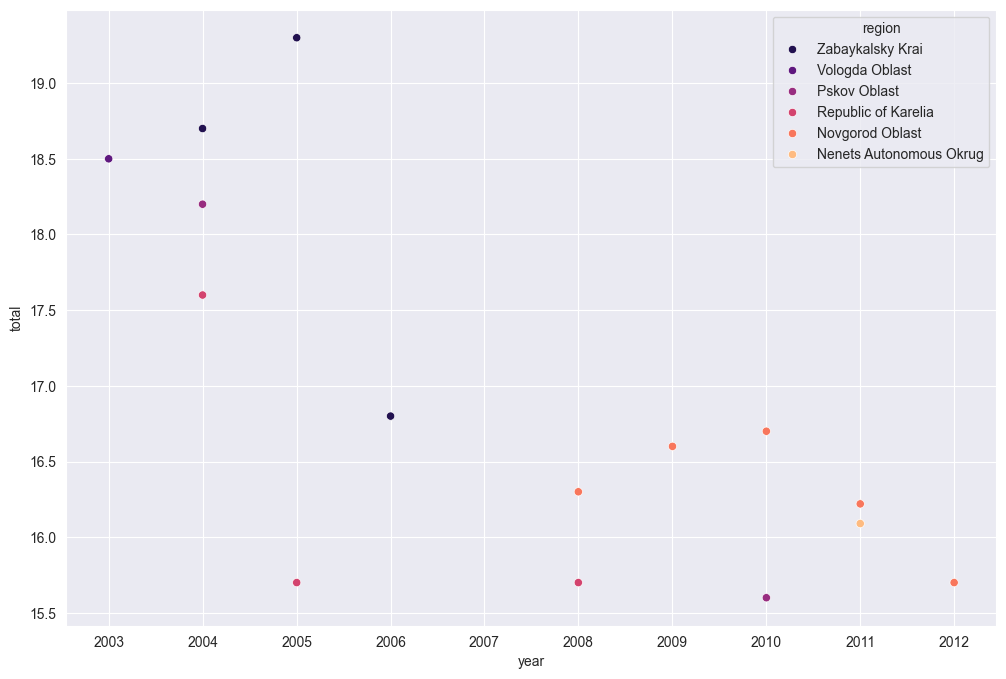

In [46]:
#Group the filtered data by year and region
yearly_top_trends = stores.groupby(['year', 'region'])[['wine', 'champagne']].sum().reset_index()
yearly_top_trends['total'] = yearly_top_trends['wine'] + yearly_top_trends['champagne']
filtered_trends = yearly_top_trends.sort_values('total', ascending=False).head(15)
filtered_trends.reset_index(inplace=True)
filtered_trends.to_csv(r"C:\Users\user\Downloads\Datasets\filtered_trends.csv", index=False)
print(filtered_trends)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_trends, x='year', y='total', hue='region', marker='o')
#plt.show()

# Regional Wine Consumption Trends (Top 10 Regions)
The scatter plot illustrates the top regions with highest wine Sold across each year. Each data point represents the region with top wine sales that year, highlighting how consumption varied over time. 
**Zabaykalsky Krai, Vologda Oblast and Pskov Oblast** dominate the upper range of total sales, particularly in the early 2000s. **Republic of Karelia and Novgorod Oblast** show lower total sales, generally fluctuating between **16.5 and 17.5 litres.**

Higher consumption was mostly recorded **before 2006,** with a downward shift or decline in the values the following years. No clear upward trend is visible post-2006, possibly indicating saturation or changing preferences in those regions.

# **Recommendations and Findings**
## Top 10 Regions With Similar Buying Habits to Saint Petersburg
In line with the goal of this project, which is to identify regions with high wine consumption or buying habits similar to Saint Petersburg, in order to target them with future wine promotions. Based on the analysis, the following are the Top 10 regions that exhibit similar buying habits.

1. Republic of Karelia **224.65**
2. Moscow  **223.59**
3. Pskov Oblast  **218.14**
4. Komi Republic  **207.50**
5. Nenets Autonomous Okrug **207.09**
6. Novgorod Oblast **199.22**
7. Arkhangelsk Oblast **195.72**
8. Murmansk Oblast **194.94**
9. Vologda Oblast **193.53**
10. Kamchatka Krai **190.29**

## Yearly Wine and Champagne Consumption Trend
An analysis of yearly trends reveals that both wine and champagne consumption peaked between 2008 and 2011. This surge may have been driven by cultural shifts, increased disposable income, or major events during that period that encouraged higher consumption.

However, a notable decline is observed post-2011, possibly pointing to market saturation, economic constraints, or a growing preference for alternative alcoholic beverages such as beer, vodka, or spirits. This trend should be taken into account when planning future marketing or distribution strategies.

## Regional Wine Consumption Trend
The scatter plot visualization highlights regions with the highest wine sales per year, capturing how regional consumption fluctuated over time. Each point corresponds to the leading wine-consuming region in a given year.

Key observations:

+ **Zabaykalsky Krai, Vologda Oblast, and Pskov Oblast** consistently appear among the top wine-consuming regions, especially during the early 2000s.

+ **Republic of Karelia and Novgorod Oblast** show more moderate sales, typically ranging between 16.5 and 17.5 litres.

+ The majority of high-consumption values are concentrated before 2006, followed by a gradual decline or plateau in subsequent years.

This pattern suggests a shift in regional preferences or possibly the impact of external factors influencing wine sales. Post-2006, no clear upward trend is observed, reinforcing the idea of a market slowdown in these top regions.


# **Limitations**
### 1. Lack of Demographic or Behavioral Data
The dataset appears to be region-level aggregated sales, with no breakdown by age, gender, income, or lifestyle.
This limits our ability to understand why consumption is high — we see what, but not who or why.

### 2. Assumption of Similarity Based on Volume Alone
The identification of regions similar to Saint Petersburg is based on consumption volume, not broader behavioral indicators like seasonal trends, brand preferences, or promotional responsiveness.
Similarity in total sales does not always equal similarity in consumer behavior.

### 3. No Control for Population Size
Regions with larger populations will naturally show higher consumption, which could bias results toward populous areas like Moscow.
Ideally, data should be normalized (e.g., per capita consumption) to allow fair comparisons.

### 4. Potential Data Gaps or Quality Issues
If data is incomplete, outdated, or inconsistently reported across regions/years, that could affect the accuracy of trends and rankings. 
There is no mention of data collection methods or missing value handling, which may reduce reliability.

### 5. Static Snapshot, Not Predictive
The analysis is descriptive, not predictive — it shows past trends but doesn’t model future behavior or forecast potential growth regions.

### 6. External Factors Not Considered
Cultural events, economic sanctions, import regulations, or local wine production capabilities are not factored in, though they may heavily influence consumption trends.

### Recommendation:
To overcome these limitations, future work could:
* Incorporate demographic data
* Normalize consumption figures
* Explore predictive modeling



